In [1]:
# https://github.com/brainmentorspvtltd/ML_Dataset

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline


In [4]:
def readPath(path):
    imgPath = []
    labels_length = []
    for root, folder, files in os.walk(path):
        labels_length.append(len(files))
        for file in files:
            imgPath.append(root+'/'+file)
#     print(imgPath)
    return imgPath, labels_length

In [5]:
trainingPath,trainlabelslength = readPath(path = 'dataset/Training/')

In [6]:
testPath,testlabelslength = readPath(path = 'dataset/Test/')

In [8]:
len(trainingPath)

10015

In [9]:
len(testPath)

3362

In [10]:
def convertImg(imgPath):
    imgArray = []
    for img in imgPath:
        gray = cv2.imread(img)
        imgArray.append(gray)
    imgArray = np.asarray(imgArray)
    return imgArray

In [11]:
trainImgArray = convertImg(trainingPath)
testImgArray = convertImg(testPath)

In [12]:
trainImgArray.shape

(10015, 100, 100, 3)

In [13]:
testImgArray.shape

(3362, 100, 100, 3)

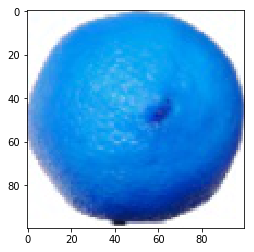

In [18]:
plt.imshow(trainImgArray[5000])

In [12]:
def one_hot_encode(vec, vals=20):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [19]:
labels = os.listdir('dataset/Training/')

In [20]:
labels,len(labels)

(['Apple Red 1',
  'Apple Red 2',
  'Banana',
  'Banana Lady Finger',
  'Cherry 2',
  'Grape White',
  'Grape White 3',
  'Guava',
  'Lemon',
  'Lemon Meyer',
  'Lychee',
  'Mango',
  'Orange',
  'Papaya',
  'Pear',
  'Pineapple',
  'Pomegranate',
  'Raspberry',
  'Strawberry',
  'Tomato Cherry Red'],
 20)

In [21]:
labels_dict = {i : labels[i] for i in range(len(labels))}

In [22]:
print(labels_dict)

{0: 'Apple Red 1', 1: 'Apple Red 2', 2: 'Banana', 3: 'Banana Lady Finger', 4: 'Cherry 2', 5: 'Grape White', 6: 'Grape White 3', 7: 'Guava', 8: 'Lemon', 9: 'Lemon Meyer', 10: 'Lychee', 11: 'Mango', 12: 'Orange', 13: 'Papaya', 14: 'Pear', 15: 'Pineapple', 16: 'Pomegranate', 17: 'Raspberry', 18: 'Strawberry', 19: 'Tomato Cherry Red'}


In [18]:
print(trainlabelslength)

[0, 492, 492, 490, 450, 738, 490, 492, 490, 492, 490, 490, 490, 479, 492, 492, 490, 492, 490, 492, 492]


In [24]:
output_labels = np.zeros((len(trainImgArray),1), dtype=np.int32)
slice_1 = 0
slice_2 = 0
for j in range(len(trainlabelslength)):
    slice_1 += trainlabelslength[j]
    slice_2 += trainlabelslength[j+1]
    output_labels[slice_1:slice_2] = int(j)

IndexError: list index out of range

In [25]:
len(output_labels)

10015

In [26]:
output_labels = np.hstack(output_labels)

In [27]:
output_labels

array([ 0,  0,  0, ..., 19, 19, 19])

In [28]:
binary_output = one_hot_encode(output_labels)

NameError: name 'one_hot_encode' is not defined

In [29]:
binary_output.shape

NameError: name 'binary_output' is not defined

In [32]:
binary_output[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [30]:
# Using KNN

def distance(x1, x2):
    return np.sqrt(((x1 - x2) ** 2).sum())

def knn(x, train, k=5):
    m = train.shape[0]
    dist = []
    for i in range(m):
        dist.append(distance(x, train[i]))
    dist = np.asarray(dist)
    indx = np.argsort(dist)
    # print("Index...",indx)
    sorted_labels = output_labels[indx][:k]
    counts = np.unique(sorted_labels, return_counts=True)
    return counts[0][np.argmax(counts[1])]

In [38]:
test_img = cv2.imread('pine_img.jpg')

In [39]:
test_img.shape

(100, 100, 3)

In [40]:
while True:
    cv2.imshow('result',test_img)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

In [41]:
train_data = trainImgArray.reshape((10015,100*100*3))
lab = knn(test_img.flatten(), train_data)
text = labels[int(lab)]

In [42]:
text

'Pineapple'